In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
stck=pd.read_csv("prices-split-adjusted.csv")


In [6]:
stck.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [7]:
stck['date']=pd.to_datetime(stck.date)

In [8]:
stck.shape

(851264, 7)

In [9]:

stck.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [10]:
stck.drop('symbol',axis=1, inplace=True)
stck.head()

,date,open,close,low,high,volume
0,2016-01-05,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,117.010002,114.970001,114.089996,117.330002,1408600.0


In [11]:
stck.isnull().sum()

date      0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [12]:
stck.isna().any()

date      False
open      False
close     False
low       False
high      False
volume    False
dtype: bool

In [13]:
stck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   open    851264 non-null  float64       
 2   close   851264 non-null  float64       
 3   low     851264 non-null  float64       
 4   high    851264 non-null  float64       
 5   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 39.0 MB


In [14]:
stck.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [15]:
print(len(stck))

851264


<AxesSubplot:>

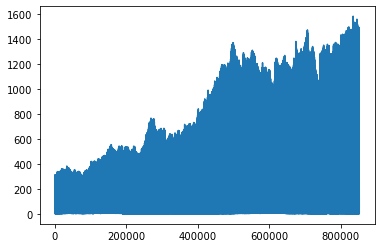

In [16]:
stck['open'].plot()

In [17]:
x=stck[['open','high','low','volume']]
y=stck['close']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [19]:
x_train.shape

(638448, 4)

In [21]:
x_test.shape

(212816, 4)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=LinearRegression()

In [24]:
regressor.fit(x_train,y_train)

LinearRegression()

In [25]:
predicted=regressor.predict(x_test)
print(x_test)

              open        high         low      volume
278854   45.639999   45.799999   45.230000    476000.0
205212   64.269997   64.690002   63.520000   8132000.0
831910  111.180000  111.779999  110.650002   1012400.0
655268   39.840000   41.000000   39.759998  10333800.0
28816    42.000000   42.439999   42.000000   1060700.0
...            ...         ...         ...         ...
635620   36.110001   36.110001   35.070000   4617200.0
762678   45.930000   45.970001   44.880001   3315800.0
846754   60.599998   60.619999   59.950001   1884700.0
103736   36.200001   36.340000   35.290001   2950900.0
621083  284.869995  288.450012  282.720001    696500.0

[212816 rows x 4 columns]


In [26]:
dfrm=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'actual':y_test,'predicted':predicted})

In [27]:
print(dfr)

            actual   predicted
278854   45.389999   45.457157
205212   64.580002   64.036358
831910  110.669998  111.254959
655268   40.709999   40.710158
28816    42.400002   42.352862
...            ...         ...
635620   35.279999   35.321787
762678   45.029999   45.165800
846754   60.080002   60.121553
103736   35.610001   35.622992
621083  285.910004  286.101510

[212816 rows x 2 columns]


In [28]:
regressor.score(x_test,y_test)

0.9999379193964397